In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Hp\AppData\Local\Temp\ipykernel_29500\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:

data = pd.read_csv("student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
X = np.array(data["Hours"])
y = np.array(data["Scores"])

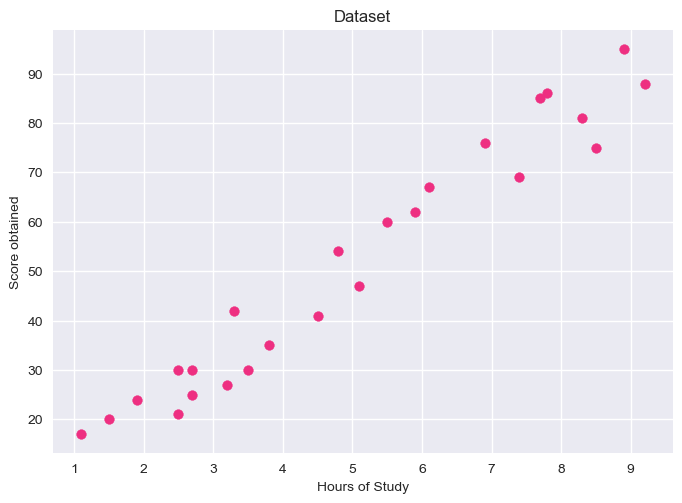

In [9]:
plt.title("Dataset")
plt.xlabel("Hours of Study")
plt.ylabel("Score obtained")
plt.scatter(X,y,color="#EE2F81")
plt.show()

In [13]:
# Spliting the Dataset into Training set and Testing set
def traintestsplit(X,y,split = 0.7):
    m = X.shape[0]
    Split = int(m*split)
    data1 = np.zeros((m,2))
    data1[:,0] = X
    data1[:,1] = y
    np.random.shuffle(data1)
    Xtrain = data1[:Split,0]
    ytrain = data1[:Split,1]
    Xtest = data1[Split:, 0]
    ytest = data1[Split:,1]
    
    return Xtrain , ytrain , Xtest , ytest
    


In [14]:
Xtrain , ytrain , Xtest , ytest = traintestsplit(X,y)

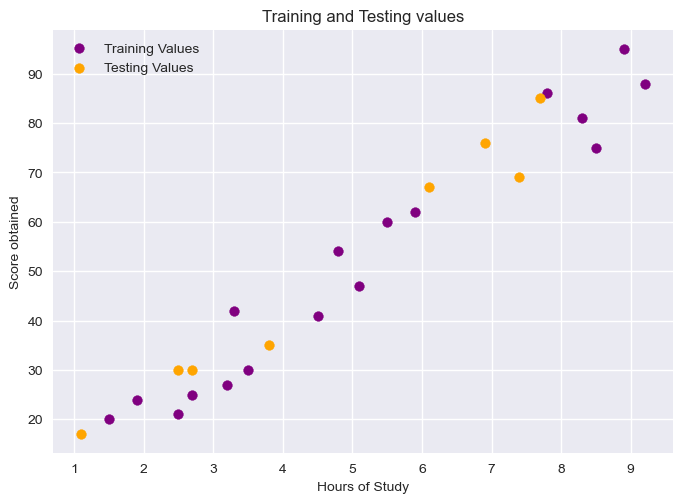

In [16]:
plt.title("Training and Testing values")
plt.xlabel("Hours of Study")
plt.ylabel("Score obtained")
plt.scatter(Xtrain , ytrain , label="Training Values" , color = "purple")
plt.scatter(Xtest , ytest , label = "Testing Values" , color = "orange")
plt.legend()
plt.show()

In [21]:
# Finding the best parameter for the model using Normal equation method
def parameters(X,y):
    X = np.c_[np.zeros(len(X))+1, X]
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    return theta

train1 = parameters(Xtrain , ytrain)
train1

array([1.6152044, 9.7651151])

In [22]:
# Predicting the values
def predict(X,theta):
    X = np.c_[np.zeros(len(X))+1 , X]
    return X.dot(theta)

In [24]:
y_predict = predict(Xtest,train1)
y_predict

array([68.99449859, 38.72264178, 76.80659067, 12.35683101, 73.87705614,
       26.02799215, 27.98101517, 61.18240651])

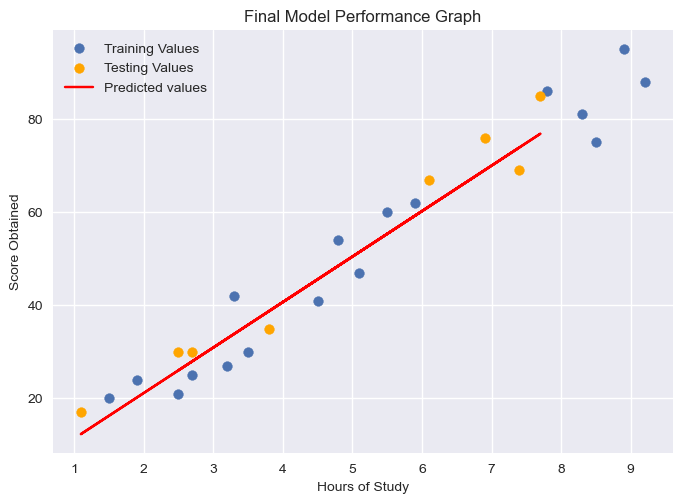

In [26]:
plt.title("Final Model Performance Graph")
plt.xlabel("Hours of Study")
plt.ylabel("Score Obtained")
plt.scatter(Xtrain , ytrain , label= "Training Values")
plt.scatter(Xtest , ytest , label = "Testing Values" , color = "orange")
plt.plot(Xtest , y_predict , label="Predicted values" , color="red")
plt.legend()
plt.show()

In [27]:
# Model evaluation

def evaluation(y , y_predict):
    ymean = y.mean()
    num = np.sum((y - y_predict)**2)
    denom = np.sum((y - ymean)**2)
    
    return 1 - num/denom

In [28]:
evaluate = evaluation(ytest , y_predict)
evaluate

0.9507807828814591